A Log-Periodic Power Law (LPPL) model is applied to see if it can accurately predict critical turning points in its exponential growth cycle.  LPPL models have their origins in statistical physics and are used to determine when a system is reaching a critical point.  While the original applications were in areas such as magnetism and  seismology,  the first use in economics was by Didier Sornette  in 1996, applying the search for critical points to the October 1987 market crash.  There have also been several studies on other financial assets including currency markets. (See Tranian 2012, Johansen 2013 ).

The LPPL model is an oscillating, exponential model for price evolution. The intuition that underlies crash prediction is essentially the idea of the impossibility for continuing  exponential price growth, with increasing oscillations approaching failure indicated by swings in investor sentiment.

Mathematically, a basic LPPL model proposes that the price of an asset evolves at time t according to:

LPPL eq1 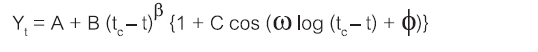
where:

ln[P(t)]  –  natural log of  Price p at time t
tc   –  the “Critical Time”  period i.e. the time of most probable crash
β (beta)  –  the exponential price growth with constraint   0 < β< 1
ω (omega) – the oscillation amplitude with general constraint   2 < ω < 20
ϕ (phi)  – a fixed phase constant parameter with constraint  0 < ϕ < 2π
A  – a constant equal to the log price at the Critical time (tc)  (ie. ln[P(tc)]  > 0 )
B(o) – a constant embodying the scale of power law where B(o) <0
C – a constant that captures the magnitude of the oscillation around price growth where|C| < 1

In [53]:
'''
* Notebook to calculate the critical time of market crash using LPPL
* Using scipy basinhopping package
* Author: Nihar Raut

We check the bubble critical time for different asset classes.
Only Tech bubble in place for now. 

TODO:
Add other asset classes which have shown bubble behaviour in past or are currently in a bubble
Try genetic algorithm instead of BasinHopping

'''

import os
import numpy as np
import scipy.stats as scs
from scipy.optimize import basinhopping
import matplotlib.pyplot as plt
import pandas as pd


In [22]:

# Log periodic function, as per https://ideas.repec.org/a/eee/finana/v30y2013icp287-297.html
def y(x, A,B,tc,m,C,o,phi):

    return A + B*(tc-x)**m + C*(tc-x)**m*np.cos(o *np.log(tc-x)+phi)

def E_func(params):
        ret = y(xd, params[0], params[1], params[2], params[3],
                params[4],params[5], params[6])

        n = float(len(ret))
        er = (ret - yd).dot(ret - yd) / n

        if np.isnan(er):
            er = 1e10

        return er

In [93]:
def run_main(data,file_name,p0):
    yd = np.array(data)
    print(len(yd)," days")
    global min_tc 
    min_tc = len(yd)/255
    xd = np.linspace(1, len(yd)/255, len(yd))
    
    class MyBounds(object):
        ''' Implements Bounds
        '''
        print(min_tc)
        def __init__(self, xmax=[200, 0, min_tc+3, 0.5,1, 7.92,6.28],
                           xmin=[0, -10,min_tc, 0.15,-10, 4.8, 0]):
            self.xmax = np.array(xmax)
            self.xmin = np.array(xmin)
    
        def __call__(self, **kwargs):
            ''' Evaluater -- Returns True if we accept the solution, False
                otherwise.
            '''
            x = kwargs["x_new"]
    
            tmax = bool(np.all(x <= self.xmax))
            tmin = bool(np.all(x >= self.xmin))
    
            # Only accept solutions within all parameter bounds
            return tmax and tmin
    ####################
    # Heuristic Fitting

    # Initial guess at the parameters:
    

    mybound = MyBounds()
    #take_step=mystep,
    ret = basinhopping(E_func, p0,  accept_test=mybound)
    
    print("Params: params_fit = [{0}, {1}, {2}, {3}, {4},{5},{6}]".format(*ret.x))
    
    plt.scatter(xd, yd)
    xd = np.linspace(1, len(yd)/255, len(yd))
    plt.plot(xd, y(xd, *ret.x), c='r')
    print("Critical Time tc ",ret.x[2])
    print("This translates to ",(ret.x[2]-min_tc)*255, " days")
    #fname = "lppl_basinhopping_fit_TechBubble2002.png"
    
    save_file = os.path.join('images', file_name)
    
    plt.savefig(save_file)

    plt.show()

####  Tech Bubble
Scenario: Nasdaq has hit 2500 for the first time propelled on the tech boom

Date : 4/5/1999

We have to check for the critical time



822  days
3.223529411764706
Params: params_fit = [-19.20330837407822, 36.36484731579199, 3.6339003179778073, -0.16392090092855616, -1.2888410807229569,5.555154166854144,8.273747038723426]
Critical Time tc  3.6339003179778073
This translates to  104.64458108434084  days


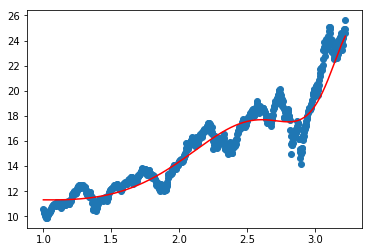

In [73]:
#Load Data : Window 1/1/1996 to 4/5/1999
prices = pd.read_csv("./data/nasdaq.csv")

prices = np.array(prices['Close'][(prices['Date']>='1996-01-01') & (prices['Date']<='1999-04-05') ]/100)
p0 =  [ 10,-2,4,0.33,0.5,6.36,3.14]  # Generally suitable values
run_main(prices,'Tech_Bubble',p0)


The critical time given by the LPPL model is 104 days.

However, we can also notice that the parameters are not in the specified bounds. This suggests that this might not be the
optimal solution. Basinhoping being a metaheuristic, there is no guarantee of finding an optimum or near optimum solution of the cost function. But, heuristically, the fit is good and the critical time arrived at should not be ignored.

Retrospectively, the index went till 5000 and reveresed by second half of 2000.

In [ ]:
#Critical time for S&P Feb 2018 crash

prices_snp = pd.read_excel("./data/gspc_excl.xlsx")

prices_snp = np.array(prices_snp['Close'][(prices_snp['Date']>='1/1/2008') & (prices_snp['Date']<='12/31/2017') ]/100)
p0 =  [ 1,1,12,1,1,1,1]# Generally suitable values
run_main(prices_snp,'S&P_February2018Crash',p0)


2518  days
9.874509803921569


D:\Softwares\Anaconda3-5\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """
D:\Softwares\Anaconda3-5\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """
D:\Softwares\Anaconda3-5\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """
